<a href="https://colab.research.google.com/github/pranit06/Deep_Learning/blob/main/DL_Exp1_30112020(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arabic Letters


## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [ ]:
!wget http://upscfever.com/datasets/csvTrainImages13440x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTrainLabel13440x1.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestImages3360x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestLabel3360x1.csv -P drive/app

In [ ]:
train_data = pd.read_csv('drive/app/csvTrainImages13440x1024.csv', header = None)
train_label = pd.read_csv('drive/app/csvTrainLabel13440x1.csv', header = None)
test_data = pd.read_csv('drive/app/csvTestImages3360x1024.csv', header = None)
test_label = pd.read_csv('drive/app/csvTestLabel3360x1.csv', header = None)

In [ ]:
train_data.info()

In [ ]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

## Visualizing the dataset

In [ ]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

In [ ]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

### The training set

In [ ]:
display_image(train_data, 32, 16)

### The test set

In [ ]:
display_image(test_data, 32, 16)

## Data preprocessing

In [ ]:
train_label = to_categorical(train_label,28)

In [ ]:
train_data = train_data/255
test_data = test_data/255

In [ ]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

## By CNN

In [ ]:
recognizer = Sequential()

recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Flatten())
recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
recognizer.add(Dense(units = 256, activation = "relu"))
recognizer.add(Dropout(0.5))
recognizer.add(Dense(28, activation = "softmax"))

In [ ]:
recognizer.summary()

In [ ]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
recognizer.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [ ]:
datagen.fit(train_data)

## Fitting the CNN to the training data

In [ ]:
history = recognizer.fit_generator(datagen.flow(train_data,train_label, batch_size=100),
                             epochs = 30, verbose = 2, steps_per_epoch=train_data.shape[0] // 100)

## Making the predictions

In [ ]:
predictions = recognizer.predict(test_data)
predictions = np.argmax(predictions,axis = 1)

## Generating a confusion matrix

In [ ]:
cm = confusion_matrix(test_label, predictions)

## Calculating the accuracy

In [ ]:
accuracy = sum(cm[i][i] for i in range(28)) / test_label.shape[0]
print("accuracy = " + str(accuracy))

## Screenshot

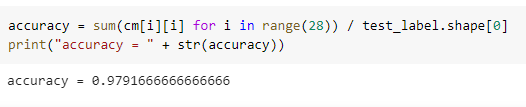

## Plots

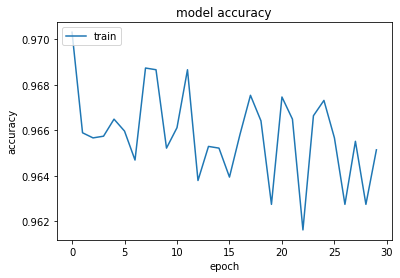

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


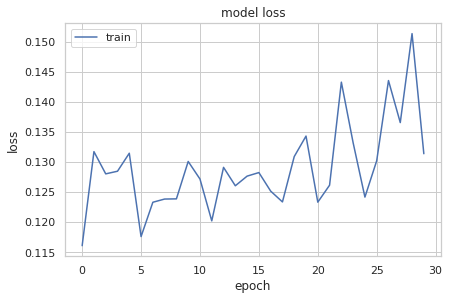

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(test_label, predictions, average="macro"))
print('recall score - ', recall_score(test_label, predictions, average="macro"))    

precision score -  0.9794218018316766
recall score -  0.9791666666666667


## Saving and Loading model

In [ ]:
model.save('final_model')

INFO:tensorflow:Assets written to: final_model/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('final_model')

# Flowers

## Downloading Data

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
!wget http://upscfever.com/datasets/flowers-new.zip -P drive/app
import os
os.chdir('drive/app')  #change dir
!unzip -q flowers-new.zip  #unzip data in test/

--2020-12-03 10:11:56--  http://upscfever.com/datasets/flowers-new.zip
Resolving upscfever.com (upscfever.com)... 104.27.177.133, 104.27.176.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/flowers-new.zip [following]
--2020-12-03 10:11:56--  https://upscfever.com/datasets/flowers-new.zip
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘drive/app/flowers-new.zip’

flowers-new.zip         [         <=>        ]   5.74M  2.33MB/s    in 2.5s    

2020-12-03 10:12:00 (2.33 MB/s) - ‘drive/app/flowers-new.zip’ saved [6021364]



## Data was downloaded and augmented and reuploaded

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/Colab Notebooks/DL/Flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/Colab Notebooks/DL/Flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/Colab Notebooks/DL/Flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/Colab Notebooks/DL/Flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/Colab Notebooks/DL/Flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 260/260 [00:01<00:00, 221.52it/s]

260


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 260/260 [00:44<00:00,  5.87it/s]

520


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 260/260 [00:01<00:00, 217.36it/s]

780


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 260/260 [00:01<00:00, 224.28it/s]

1040


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 260/260 [00:01<00:00, 214.49it/s]

1300


## Visualizing Data

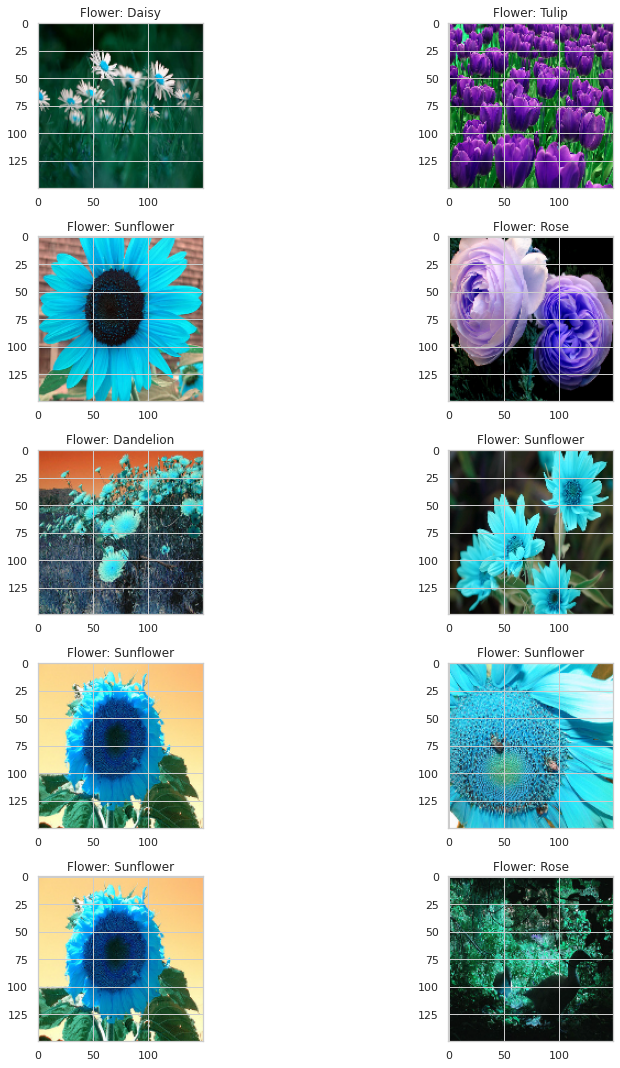

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

## Data Preprocessing

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
y_test.shape

(325, 5)

## Building CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## Data Augmentataion

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 96)       

## Running model

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
8/8 [==============================] - 4s 546ms/step - loss: 1.6085 - accuracy: 0.3015 - val_loss: 1.3853 - val_accuracy: 0.5138
Epoch 2/50
8/8 [==============================] - 4s 513ms/step - loss: 1.2224 - accuracy: 0.5087 - val_loss: 1.0199 - val_accuracy: 0.5723
Epoch 3/50
8/8 [==============================] - 4s 505ms/step - loss: 0.9818 - accuracy: 0.6000 - val_loss: 0.8937 - val_accuracy: 0.6492
Epoch 4/50
8/8 [==============================] - 4s 495ms/step - loss: 0.8249 - accuracy: 0.6421 - val_loss: 0.7654 - val_accuracy: 0.6769
Epoch 5/50
8/8 [==============================] - 4s 491ms/step - loss: 0.7454 - accuracy: 0.6831 - val_loss: 0.6089 - val_accuracy: 0.8062
Epoch 6/50
8/8 [==============================] - 4s 502ms/step - loss: 0.6201 - accuracy: 0.7467 - val_loss: 0.4720 - val_accuracy: 0.8369
Epoch 7/50
8/8 [==============================] - 4s 492ms/step - loss: 0.5261 - accuracy: 0.7897 - val_loss: 0.3486 - val_accuracy: 0.8892
Epoch 8/50
8/8 [====

In [ ]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis = 1)

In [ ]:
y_test_ = to_categorical(y_test)

In [ ]:
predictions = to_categorical(predictions,5)

In [ ]:
a = np.argmax(predictions ,axis=1)

In [ ]:
a

array([1, 4, 1, 0, 4, 1, 0, 3, 3, 0, 2, 4, 1, 0, 3, 3, 4, 4, 2, 4, 1, 1,
       2, 0, 3, 3, 2, 0, 0, 2, 0, 3, 1, 0, 3, 4, 0, 4, 2, 3, 4, 1, 0, 1,
       2, 4, 4, 2, 4, 3, 0, 4, 2, 1, 0, 2, 3, 2, 3, 3, 4, 1, 2, 3, 3, 2,
       3, 0, 1, 0, 3, 4, 1, 0, 2, 0, 2, 3, 4, 3, 1, 3, 1, 3, 2, 0, 3, 0,
       0, 3, 0, 1, 3, 3, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 4, 3, 1, 3, 2, 4,
       3, 2, 3, 0, 1, 2, 4, 2, 4, 3, 4, 3, 4, 1, 4, 2, 4, 3, 4, 1, 1, 2,
       4, 1, 1, 2, 3, 4, 3, 1, 4, 1, 4, 4, 0, 2, 1, 3, 1, 2, 4, 2, 2, 0,
       3, 0, 2, 0, 2, 3, 1, 0, 3, 0, 0, 1, 2, 3, 1, 3, 2, 1, 2, 4, 0, 3,
       0, 3, 0, 4, 4, 0, 2, 1, 1, 1, 0, 3, 4, 2, 1, 3, 4, 4, 1, 4, 3, 0,
       3, 0, 3, 1, 2, 2, 3, 2, 0, 3, 4, 3, 2, 3, 3, 3, 3, 2, 3, 4, 4, 0,
       2, 1, 1, 1, 4, 3, 3, 2, 1, 1, 0, 0, 1, 4, 4, 1, 0, 3, 1, 2, 3, 4,
       4, 3, 2, 1, 3, 3, 4, 1, 0, 4, 4, 0, 3, 4, 4, 3, 2, 1, 0, 0, 1, 2,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 4, 0, 1, 0, 1, 0, 1, 2, 0, 1, 4, 1,
       2, 4, 1, 1, 3, 0, 3, 0, 4, 1, 0, 4, 4, 2, 0,

In [ ]:
b = np.argmax(y_test ,axis=1)

In [ ]:
b

array([1, 4, 1, 0, 4, 1, 0, 3, 3, 0, 2, 4, 1, 0, 3, 3, 4, 4, 2, 4, 1, 1,
       2, 0, 3, 3, 2, 0, 0, 2, 0, 3, 1, 0, 3, 4, 0, 4, 2, 3, 4, 1, 0, 1,
       2, 4, 4, 2, 4, 3, 0, 4, 2, 1, 0, 2, 3, 2, 3, 3, 4, 1, 2, 3, 3, 2,
       3, 0, 1, 0, 3, 4, 1, 0, 2, 0, 2, 3, 4, 3, 1, 3, 1, 3, 2, 0, 3, 0,
       0, 3, 0, 1, 3, 3, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 4, 3, 1, 3, 2, 4,
       3, 2, 3, 0, 1, 2, 4, 2, 4, 3, 2, 3, 4, 1, 4, 2, 4, 3, 4, 1, 1, 2,
       4, 1, 1, 2, 3, 4, 3, 1, 4, 1, 4, 4, 0, 2, 1, 3, 1, 2, 4, 2, 2, 0,
       3, 0, 2, 0, 2, 3, 1, 0, 3, 0, 0, 1, 2, 3, 1, 3, 2, 1, 2, 4, 0, 3,
       0, 3, 0, 2, 4, 0, 2, 1, 1, 1, 0, 3, 4, 2, 1, 3, 4, 4, 1, 4, 3, 0,
       3, 0, 3, 1, 2, 2, 3, 2, 0, 3, 4, 3, 2, 3, 3, 3, 3, 2, 3, 4, 4, 0,
       2, 1, 1, 1, 4, 3, 3, 2, 1, 1, 0, 0, 1, 4, 4, 1, 0, 3, 1, 2, 3, 4,
       4, 3, 2, 1, 3, 3, 4, 1, 0, 4, 4, 0, 3, 4, 4, 3, 2, 1, 0, 0, 1, 2,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 4, 0, 1, 0, 1, 0, 1, 2, 0, 1, 4, 1,
       2, 4, 1, 1, 3, 0, 3, 0, 4, 1, 0, 4, 4, 2, 0,

## Predictions

In [ ]:
cm = confusion_matrix(a,b)
cm

array([[70,  0,  0,  0,  0],
       [ 0, 65,  0,  0,  0],
       [ 0,  0, 58,  0,  0],
       [ 0,  0,  0, 70,  0],
       [ 0,  0,  3,  0, 59]])

In [ ]:
accuracy = sum(cm[i][i] for i in range(5)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9907692307692307


## Screenshot

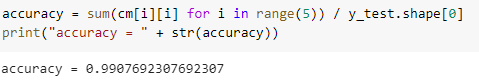

## Plots

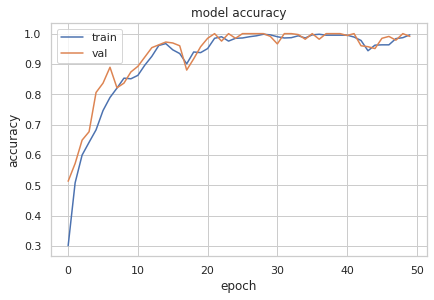

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


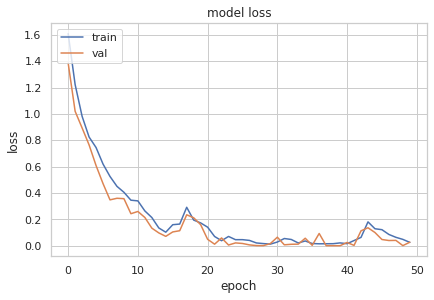

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(y_test, predictions, average="macro"))
print('recall score - ', recall_score(y_test, predictions, average="macro"))    

precision score -  0.9903225806451612
recall score -  0.9901639344262294


## Saving and Loading Model

In [ ]:
model.save('final_model2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: final_model2/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('final_model2')